In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot  as plt

In [2]:
#Q1 Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear 
#Regression given one predictor attribute and one response attribute. The 
#function should return the coefficients of the straight line.
def myFnLinReg(x,y):
    mx = np.mean(x)
    my = np.mean(y)
    b1_numerator = ((x - mx) * (y - my)).sum()
    b1_denominator = ((x - mx) ** 2).sum()
    b1 = b1_numerator / b1_denominator
    b0 = my - (b1 * mx)
    return (b0, b1)

In [3]:
#Q2 Use mtcars data set and consider the attributes mpg and weight. Split data into 
#train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to 
#build a linear regression model to predict mpg given the weight of the car.

df = pd.read_csv("mtcars.csv")
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
X = df.wt
X = np.array(X)

Y = df.mpg
Y = np.array(Y)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 4389)

In [6]:
b0, b1 = myFnLinReg(train_x,train_y)

In [7]:
print("y = {} + {}x".format(round(b0, 3), round(b1, 3)))

y = 38.795 + -5.838x


Text(0, 0.5, 'Miles per gallon')

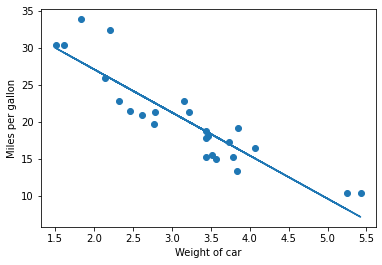

In [8]:
plt.scatter(train_x, train_y)
plt.plot(train_x, b0 + b1*train_x)
plt.xlabel("Weight of car")
plt.ylabel("Miles per gallon")

In [9]:
def predict(b0, b1, test_x):
    y = b0 + b1*test_x
    return y

In [10]:
pred_y = predict(b0,b1,test_x)
print(pred_y)

[22.01148454 27.4990225  17.95420913 20.17257554 20.28933167  7.59210288
 18.71312396]


In [11]:
#Q3 What is the mpg of a car, whose weight is 5.5?
print("The mpg of a car with weight 5.5 is", round(predict(b0, b1, 5.5), 3))

The mpg of a car with weight 5.5 is 6.687


In [12]:
#Q4 Compute and print accuracy measures such as RMSE and R2 for the test set.
def calculateRMSE_R2(test_y, pred_y):
    n = len(test_x)
    RMSE = mean_squared_error(pred_y, test_y)**0.5
    R2 = r2_score(pred_y, test_y)
    return RMSE, R2

In [13]:
calculateRMSE_R2(test_y, pred_y)

(3.8396506811573454, 0.5209762418295047)

In [14]:
#Q5 Apply the stochastic gradient descent and mini batch gradient descent 
#algorithms to enhance the accuracy and visualize the cost function.
def SGD(x_train, y_train, alpha = 0.006, m = 10000):
    t0 = 0
    t1 = 0
    for i in range(m):
        y_i = t0 + t1 * x_train
        t0 = t0 - (alpha * sum(y_i - y_train)) / len(x_train)
        t1 = t1 - (alpha * sum((y_i - y_train) * x_train)) / len(x_train)
    return t0, t1, y_i


In [15]:
g, h, i = SGD(train_x, train_y, alpha = 0.1, m = 10000)
print(g, h)

38.79517776876225 -5.837806340653143


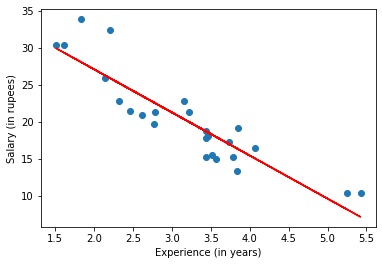

In [16]:
plt.scatter(train_x, train_y)
plt.plot(train_x, i, color = 'red')
plt.xlabel( "Experience (in years)" )
plt.ylabel( "Salary (in rupees)" )
plt.show()

In [17]:
def MiniBatch(X_train,Y_train, batch_size):
        
    coeff = {}
    costs = []
    
    alpha = 0.05
    epochs = 1000 
    
    M = X_train.shape[0] # number of training examples
    
    # initialising random values for weight and 0 for bias
    w = np.random.randn()
    b = 0
    
    batches = M/batch_size
    
    flag = 0
    
    if batches > int(batches):
        flag = 1
    
    batches = int(batches)
    
    # iterations
    for epoch in range(epochs):
        
        batch = 0
        
        m_b_costs = []
        
        while batch < batches:
            
            X = X_train[batch*batch_size: (batch+1)*batch_size]
            Y = Y_train[batch*batch_size: (batch+1)*batch_size]
            
            h = w*X + b # hypothesis
        
            J = (1/(2*M))*(((h - Y)*2).sum()) # cost J of hypothesis

            costs.append(J) # appending cost to cost history

            dw = (1/M)*(((h - Y).dot(X)).sum()) # derivative of J w.r.t w

            db = (1/M)*((h - Y).sum()) # derivative of J w.r.t b

            # updating weight and bias
            w = w - alpha * dw
            b = b - alpha * db
            
            batch += 1
        
        if flag == 1:
            X = X_train[batch*batch_size:]
            
            h = w*X_train + b # hypothesis
            
            J = (1/(2*M))(((h - Y_train)*2).sum()) # cost J of hypothesis
            
            costs.append(J) # appending cost to cost history
            
            dw = (1/M)*(((h - Y_train).dot(X_train)).sum()) # derivative of J w.r.t w
            
            db = (1/M)*((h - Y_train).sum()) # derivative of J w.r.t b
        

        # updating weight and bias
        w = w - alpha * dw
        b = b - alpha * db
        
    # storing weight and bias   
    coeff["theta"] = w
    coeff["bias"] =  b
    
    return coeff, costs

In [18]:
coeff, costs = MiniBatch(train_x, train_y, 5)
print(coeff)

{'theta': -5.861951379256664, 'bias': 38.230490153969065}
